# Import & Load
유튜브: https://youtu.be/gGaMXImmaIA

In [24]:
import pandas as pd
import numpy as np
import datetime

from scipy.stats import ttest_ind

from matplotlib import pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [25]:
df = pd.read_csv('data.csv')
df['매수시간(초)'] = pd.to_datetime(df['매수시간']).apply(lambda x : x.time().second)

# 매수시간에 따른 수익률

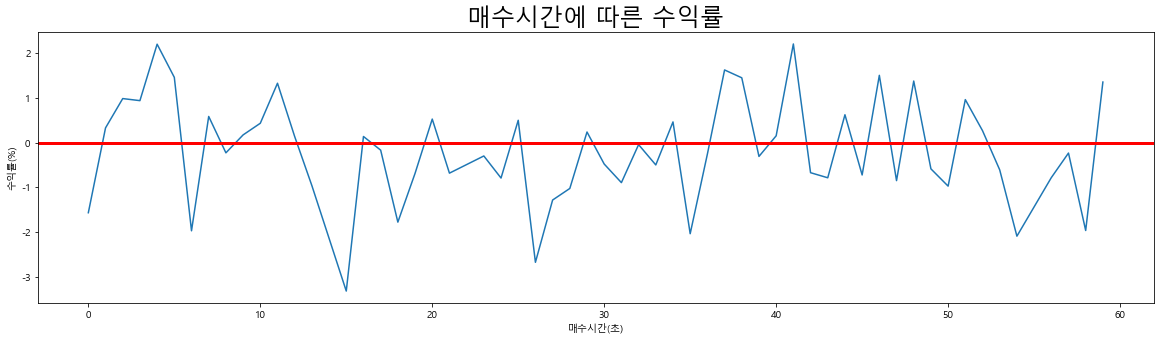

In [33]:
df.groupby('매수시간(초)')['수익률'].mean().plot()
plt.ylabel('수익률(%)')
plt.title('매수시간에 따른 수익률', size=24)
plt.axhline(y=0, color='r', linewidth=3)
plt.rcParams["figure.figsize"] = (20, 5)
plt.show()

# 평균과 P값
P-value: 귀무가설에서 주장한 바가 옳을 확률

In [34]:
df['주문일자'] = pd.to_datetime(df['주문일자'])
dates = df['주문일자'].unique()
periods = [5,20,len(dates)]
pieces = []

for period in periods:
    frame = df[df['주문일자'] >= dates[-period]]
    
    A = frame[(frame['매수시간(초)'] >= 36) | (frame['매수시간(초)'] < 12)]['수익률']
    B = frame[(frame['매수시간(초)'] < 36) & (frame['매수시간(초)'] >= 12)]['수익률']
    
    A_mean = round(A.mean(),2)
    B_mean = round(B.mean(),2)   
    p_value = round(ttest_ind(A, B)[1],3)
    
    pieces.append([period, A_mean, B_mean, p_value])
    
dataframe = pd.DataFrame(pieces, columns=['기간','x>=36 or x<12','12<=x<36','p-value'])
dataframe = dataframe.set_index('기간')
dataframe

,x>=36 or x<12,12<=x<36,p-value
기간,,,
5,-0.29,-0.39,0.854
20,-0.07,-0.58,0.152
23,0.25,-0.68,0.011


# Conclusion
36초~12초 매수한다.  
스캘핑은 몇 초에 매수하는지가 중요하다.